In [10]:
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt

In [11]:
data_file = 'World_win/World_win/SimResults/log_220506_151226.txt'
key = {
"0": "Elephant",
"1": "Elephant",
"2": "Elephant",
"3": "Elephant",
"4": "Elephant",
"5": "Elephant",
"6": "Elephant",
"7": "Elephant",
"8": "Elephant",
"9": "Elephant",
"10": "Elephant",
"11": "Elephant",
"12": "Lion",
"13": "Lion",
"14": "Lion",
"15": "Lion",
"16": "Lion",
"17": "Lion",
"18": "Zebra",
"19": "Zebra",
"20": "Zebra",
"21": "Zebra",
"22": "Zebra",
"23": "Zebra",
"24": "Zebra",
"25": "Zebra",
"26": "Zebra",
"27": "Zebra",
"28": "Zebra",
"29": "Zebra",
"30": "Zebra",
"31": "Zebra",
"32": "Zebra"
}


In [12]:
df = pd.read_json(data_file, lines=True)

In [13]:
df.values[0][0]

{'deviceId': '626b32fce99901001d1759f5_29',
 'timestamp': 74.52,
 'sensors': [{'id': 1651192806232,
   'type': 31,
   'input': {'pulseOxygen': [187.5, 96]}},
  {'id': 1651192776528,
   'type': 27,
   'input': {'location': [94.90204, 776.9186]}},
  {'id': 1651192790371, 'type': 24, 'input': {'temperature': 22.94914}},
  {'id': 1651781505582, 'type': 25, 'input': {'humidity': 33.05759}}]}

In [14]:
gps = defaultdict(list)
pulseoxygen = defaultdict(list)
for x in df.values:
    for device in x:
        if device is None:
            continue
        device_id = device['deviceId']
        timestamp = device['timestamp']
        for sensor in device['sensors']:
            s = list(sensor['input'].keys())[0]
            if s == 'location':
                gps[device_id].append((sensor['input'][s], timestamp))
            if s == 'pulseOxygen':
                pulseoxygen[device_id].append(sensor['input'][s])

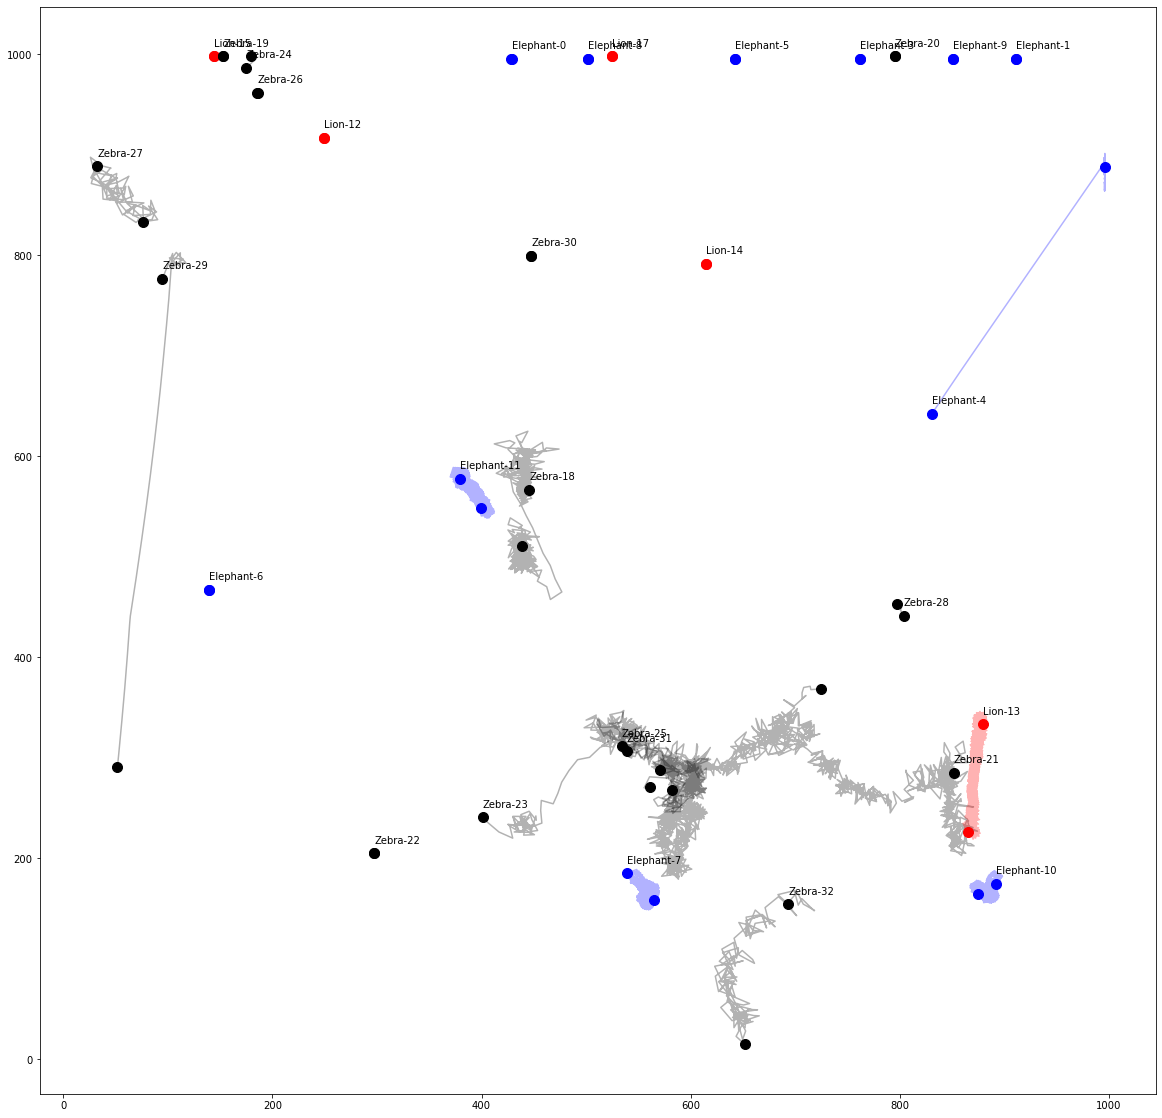

In [25]:
plt.figure(figsize=(20, 20))

colors = {
    'Lion': 'r',
    'Zebra': 'k',
    'Elephant': 'b'
}

for c, k in enumerate(gps.keys()):
    animal_id = k.split("_")[1]
    animal = key[animal_id]
        
#     gps[k] = sorted(gps[k], key=lambda x: x[1])
    lat = [x[0][0] for x in gps[k]]
    lon = [x[0][1] for x in gps[k]]
    
    plt.plot(lat, lon, color=colors[animal], alpha=0.3)
    
    plt.plot(lat[0], lon[0], marker="o", markersize=10, 
             markerfacecolor=colors[animal], markeredgecolor=colors[animal])
    plt.plot(lat[-1], lon[-1], marker="o", markersize=10, 
             markerfacecolor=colors[animal], markeredgecolor=colors[animal])
    
    plt.annotate('{}-{}'.format(animal, animal_id), (lat[0], lon[0] + 10))
    
plt.show()

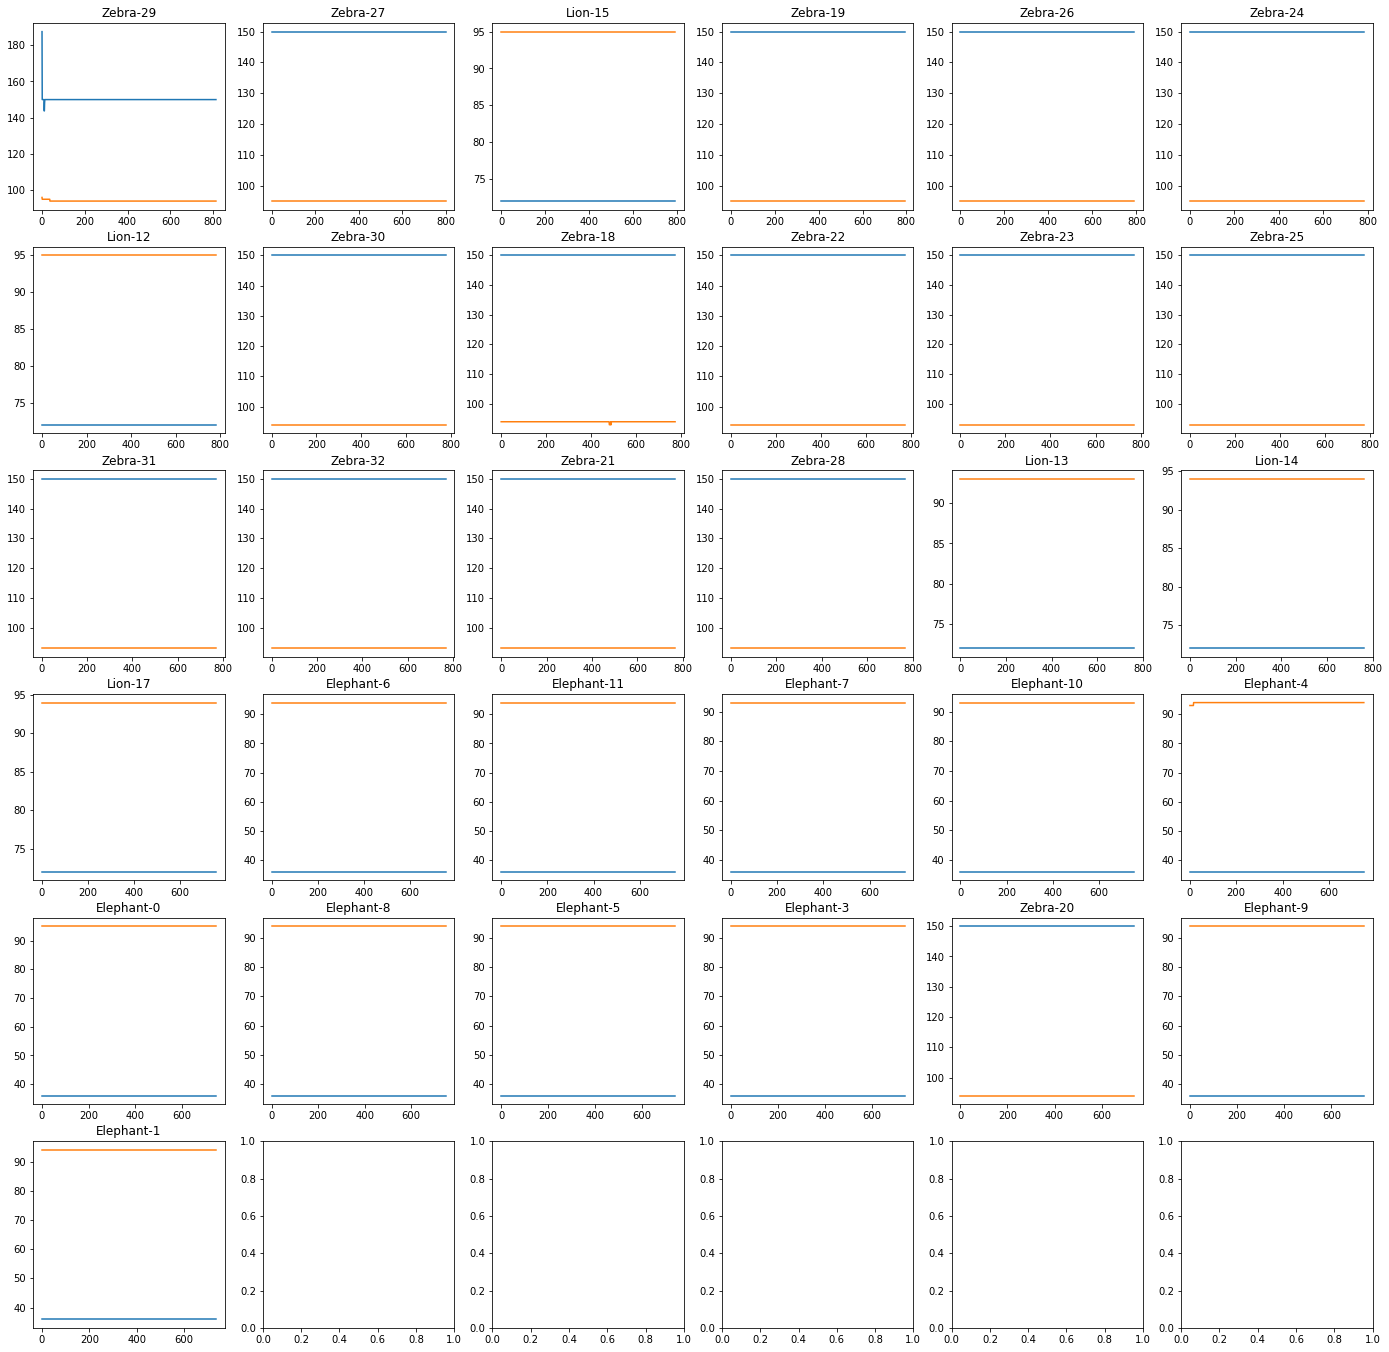

In [16]:
fig, axs = plt.subplots(6, 6, figsize=(24, 24))

colors = {
    'Lion': 'r',
    'Zebra': 'k',
    'Elephant': 'b'
}

for c, k in enumerate(pulseoxygen.keys()):
    
    animal_id = k.split("_")[1]
    animal = key[animal_id]
    
    row = c // 6
    col = c % 6
    
    pulse = [x[0] for x in pulseoxygen[k]]
    oxygen = [x[1] for x in pulseoxygen[k]]
        
    axs[row][col].plot(pulse, label='pulse')
    axs[row][col].plot(oxygen, label='oxygen')
    axs[row][col].set_title('{}-{}'.format(animal, animal_id))
    
plt.show()

In [17]:
speeds = []
for k in gps.keys():
    lat = [x[0][0] for x in gps[k]]
    lon = [x[0][1] for x in gps[k]]
    timestamp = [x[1] for x in gps[k]]
    
    for i in range(1, len(lat)):
        dist = np.sqrt((lat[i] - lat[i - 1])**2 + (lon[i] - lon[i - 1])**2)
        dt = timestamp[i] - timestamp[i - 1]
        s = dist / dt
    speeds.append(s)

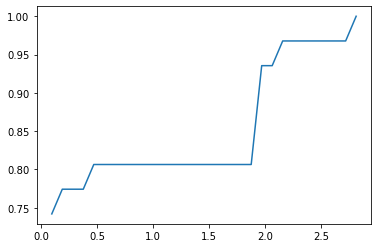

In [18]:
count, bins_count = np.histogram(speeds, bins=30)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.show()